# Gary dart points

In [1]:
# load analysis packages
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn import metrics

# read data
data = pd.read_csv('garysite.csv')
data.head()

,spec,maxl,maxw,maxth,maxstl,maxstw,site,region
0,fs101,69.48,26.90,7.55,9.23,16.52,Cooper,east
1,fs1035,50.10,25.60,8.01,20.97,20.57,Cooper,east
2,fs109,57.72,28.70,9.54,11.01,19.01,Cooper,east
3,fs110,67.60,48.98,10.35,18.00,27.24,Cooper,east
4,fs112,35.73,22.53,8.00,14.16,15.20,Cooper,east


### select features and response

In [2]:
# attributes for analysis
feature_cols = ['maxl', 'maxw', 'maxth', 'maxstl', 'maxstw']
X = data[feature_cols]

# cast from string to int
reg_num = {'east':0, 'west':1}
data['reg_num'] = data.region.map(reg_num)
data.head()
y = data.reg_num

### ensure that features and responses are numeric

In [3]:
X.dtypes

maxl      float64
maxw      float64
maxth     float64
maxstl    float64
maxstw    float64
dtype: object

In [4]:
y.dtypes

dtype('int64')

### split data for train/test

In [5]:
# split data into train/test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y)

print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train:', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (688, 5)
X_test:  (230, 5)
y_train: (688,)
y_test:  (230,)


### decrease sensitivity of algorithm to outliers through standardizing features

In [6]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### k-fold cross validation of training dataset

In [7]:
logreg = LogisticRegression()
scores = cross_val_score(estimator = logreg, X = X_train_std, y = y_train,
                         cv = 20, n_jobs = 1)
print('Cross Validation Scores: ', scores)
print('Cross Validation Mean Score: ', scores.mean())
print('Cross Validation Standard Deviation: ', scores.std())

Cross Validation Scores:  [0.88571429 0.91428571 0.85714286 0.88571429 0.97142857 0.85714286
 0.82857143 0.74285714 0.85294118 0.82352941 0.82352941 0.88235294
 0.79411765 0.88235294 0.91176471 0.82352941 0.82352941 0.88235294
 0.70588235 0.97058824]
Cross Validation Mean Score:  0.8559663865546219
Cross Validation Standard Deviation:  0.06362315790112948


### fit model on training set

In [8]:
logreg.fit(X_train_std, y_train)

LogisticRegression()

### make predictions + evaluate accuracy

Receiver Operator Curve Score:  0.8503846153846154
Accuracy Score:  0.8608695652173913


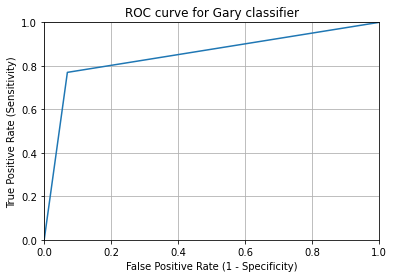

In [9]:
y_pred = logreg.predict(X_test_std)
print('Receiver Operator Curve Score: ', roc_auc_score(y_true = y_test,
                                                       y_score = y_pred))
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Gary classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)